# Project - Answering Business Questions using SQL

In this project, we will use SQL to answer important business questions.



We will work with `chinook.db` database for which schema diagram is given below:
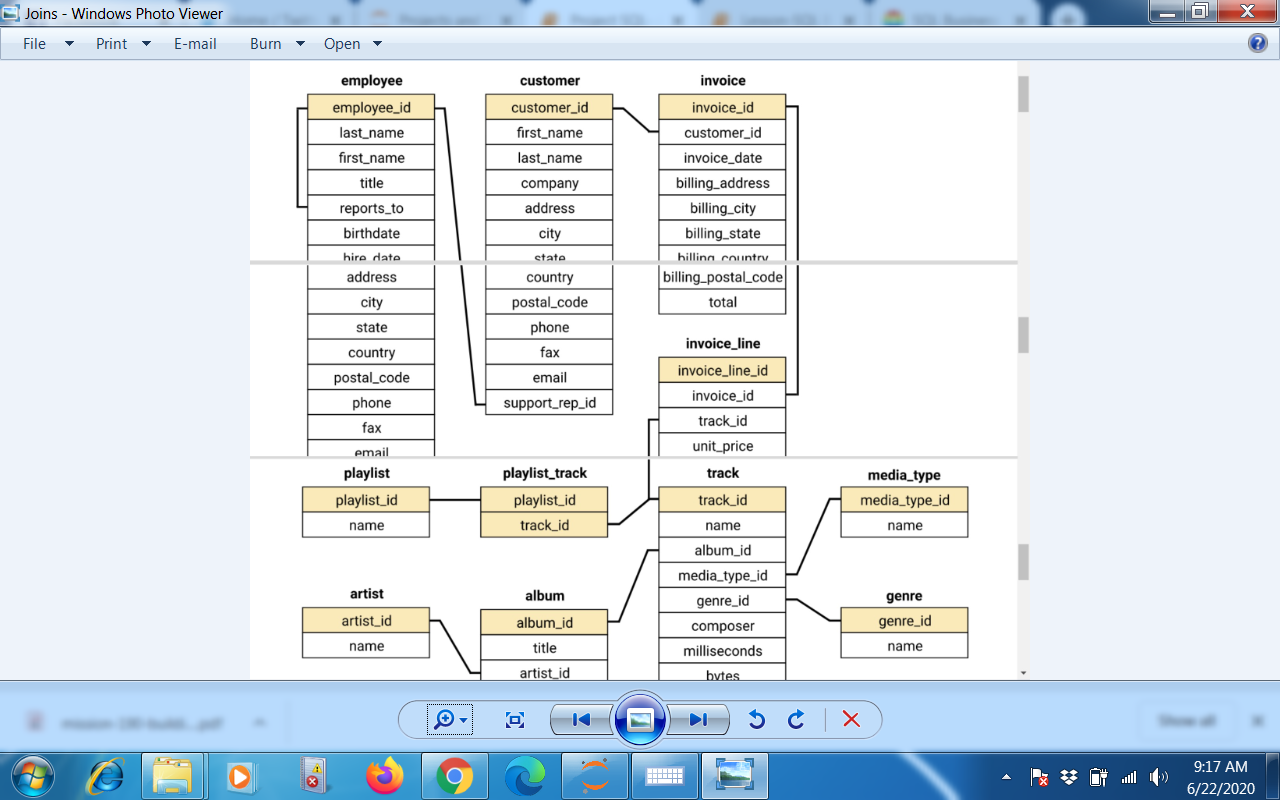

**Load sql and connect to the Database factbook.db using following magic:**

In [1]:
%%capture
%reload_ext sql
%sql sqlite:///chinook.db    

### Query the database to get table information for `chinook.db` directly:
**Use %%sql magic before query in each code cell to avoid returning an error 

In [2]:
%%sql
SELECT * 
FROM sqlite_master 
WHERE type IN ('table','view');

 * sqlite:///chinook.db
Done.


type,name,tbl_name,rootpage,sql
table,album,album,2,"CREATE TABLE [album]( [album_id] INTEGER PRIMARY KEY NOT NULL, [title] NVARCHAR(160) NOT NULL, [artist_id] INTEGER NOT NULL, FOREIGN KEY ([artist_id]) REFERENCES [artist] ([artist_id]) ON DELETE NO ACTION ON UPDATE NO ACTION)"
table,artist,artist,3,"CREATE TABLE [artist]( [artist_id] INTEGER PRIMARY KEY NOT NULL, [name] NVARCHAR(120))"
table,customer,customer,4,"CREATE TABLE [customer]( [customer_id] INTEGER PRIMARY KEY NOT NULL, [first_name] NVARCHAR(40) NOT NULL, [last_name] NVARCHAR(20) NOT NULL, [company] NVARCHAR(80), [address] NVARCHAR(70), [city] NVARCHAR(40), [state] NVARCHAR(40), [country] NVARCHAR(40), [postal_code] NVARCHAR(10), [phone] NVARCHAR(24), [fax] NVARCHAR(24), [email] NVARCHAR(60) NOT NULL, [support_rep_id] INTEGER, FOREIGN KEY ([support_rep_id]) REFERENCES [employee] ([employee_id]) ON DELETE NO ACTION ON UPDATE NO ACTION)"
table,employee,employee,5,"CREATE TABLE [employee]( [employee_id] INTEGER PRIMARY KEY NOT NULL, [last_name] NVARCHAR(20) NOT NULL, [first_name] NVARCHAR(20) NOT NULL, [title] NVARCHAR(30), [reports_to] INTEGER, [birthdate] DATETIME, [hire_date] DATETIME, [address] NVARCHAR(70), [city] NVARCHAR(40), [state] NVARCHAR(40), [country] NVARCHAR(40), [postal_code] NVARCHAR(10), [phone] NVARCHAR(24), [fax] NVARCHAR(24), [email] NVARCHAR(60), FOREIGN KEY ([reports_to]) REFERENCES [employee] ([employee_id]) ON DELETE NO ACTION ON UPDATE NO ACTION)"
table,genre,genre,6,"CREATE TABLE [genre]( [genre_id] INTEGER PRIMARY KEY NOT NULL, [name] NVARCHAR(120))"
table,invoice,invoice,7,"CREATE TABLE [invoice]( [invoice_id] INTEGER PRIMARY KEY NOT NULL, [customer_id] INTEGER NOT NULL, [invoice_date] DATETIME NOT NULL, [billing_address] NVARCHAR(70), [billing_city] NVARCHAR(40), [billing_state] NVARCHAR(40), [billing_country] NVARCHAR(40), [billing_postal_code] NVARCHAR(10), [total] NUMERIC(10,2) NOT NULL, FOREIGN KEY ([customer_id]) REFERENCES [customer] ([customer_id]) ON DELETE NO ACTION ON UPDATE NO ACTION)"
table,invoice_line,invoice_line,8,"CREATE TABLE [invoice_line]( [invoice_line_id] INTEGER PRIMARY KEY NOT NULL, [invoice_id] INTEGER NOT NULL, [track_id] INTEGER NOT NULL, [unit_price] NUMERIC(10,2) NOT NULL, [quantity] INTEGER NOT NULL, FOREIGN KEY ([invoice_id]) REFERENCES [invoice] ([invoice_id]) ON DELETE NO ACTION ON UPDATE NO ACTION, FOREIGN KEY ([track_id]) REFERENCES [track] ([track_id]) ON DELETE NO ACTION ON UPDATE NO ACTION)"
table,media_type,media_type,9,"CREATE TABLE [media_type]( [media_type_id] INTEGER PRIMARY KEY NOT NULL, [name] NVARCHAR(120))"
table,playlist,playlist,10,"CREATE TABLE [playlist]( [playlist_id] INTEGER PRIMARY KEY NOT NULL, [name] NVARCHAR(120))"
table,playlist_track,playlist_track,11,"CREATE TABLE [playlist_track]( [playlist_id] INTEGER NOT NULL, [track_id] INTEGER NOT NULL, CONSTRAINT [pk_playlist_track] PRIMARY KEY ([playlist_id], [track_id]), FOREIGN KEY ([playlist_id]) REFERENCES [playlist] ([playlist_id]) ON DELETE NO ACTION ON UPDATE NO ACTION, FOREIGN KEY ([track_id]) REFERENCES [track] ([track_id]) ON DELETE NO ACTION ON UPDATE NO ACTION)"


### 1. Selecting Albums to Purchase

**Scenario**
The Chinook record store has just signed a deal with a new record label, and you've been tasked with selecting the first three albums that will be added to the store, from a list of four. All four albums are by artists that don't have any tracks in the store right now - we have the artist names, and the genre of music they produce:

    Artist Name 	            Genre
          Regal  	            Hip-Hop
       Red Tone	                Punk
Meteor and the Girls     	    Pop

     Slim Jim Bites	           Blues
     
The record label specializes in artists from the USA, and they have given Chinook some money to advertise the new albums in the USA, so we're interested in finding out which genres sell the best in the USA.

We'll need to write a query to find out which genres sell the most tracks in the USA, write up a summary of your findings, and make a recommendation for the three artists whose albums we should purchase for the store.

**Requirement**

1. Write a query that **returns each genre**, with the **number of tracks** sold in the **USA**:
  - in absolute numbers
  - in percentages.
2. Write a paragraph that interprets the data and makes a recommendation for the three artists whose albums we should purchase for the store, based on sales of tracks from their genres.  

We will build the query progressively. 
1. Join `genre` and `track` tables

In [3]:
%%sql
SELECT
     g.genre_id,
     g.name,
     t.track_id,
     t.name
  FROM genre AS g    
     INNER JOIN track AS t ON t.genre_id = g.genre_id
GROUP By 1,3 
ORDER BY 1;   

 * sqlite:///chinook.db
Done.


genre_id,name,track_id,name_1
1,Rock,1,For Those About To Rock (We Salute You)
1,Rock,2,Balls to the Wall
1,Rock,3,Fast As a Shark
1,Rock,4,Restless and Wild
1,Rock,5,Princess of the Dawn
1,Rock,6,Put The Finger On You
1,Rock,7,Let's Get It Up
1,Rock,8,Inject The Venom
1,Rock,9,Snowballed
1,Rock,10,Evil Walks


2. Chain first subquery with invoice_line table

In [4]:
%%sql
WITH 
    genre_track AS
                 (
                 SELECT
                      g.genre_id,
                      g.name,
                      t.track_id,
                      t.name
                  FROM genre AS g    
                                 INNER JOIN track AS t ON t.genre_id = g.genre_id
                 GROUP By 1,3 
                 ORDER BY 1
                 ),
    
    genre_track_invoice AS
                         (
                          SELECT   
                               gt.*,
                               il.invoice_id
                            FROM genre_track AS gt
                                                LEFT JOIN invoice_line AS il ON il.track_id = gt.track_id
                         )    
SELECT * 
  FROM genre_track_invoice
 LIMIT 20; 


 * sqlite:///chinook.db
Done.


genre_id,name,track_id,name:1,invoice_id
1,Rock,1,For Those About To Rock (We Salute You),23
1,Rock,1,For Those About To Rock (We Salute You),107
1,Rock,1,For Those About To Rock (We Salute You),252
1,Rock,1,For Those About To Rock (We Salute You),385
1,Rock,1,For Those About To Rock (We Salute You),414
1,Rock,1,For Those About To Rock (We Salute You),421
1,Rock,1,For Those About To Rock (We Salute You),446
1,Rock,1,For Those About To Rock (We Salute You),496
1,Rock,2,Balls to the Wall,106
1,Rock,2,Balls to the Wall,127


3. Chain 2nd subquery with `invoice` table

In [5]:
%%sql 
WITH 
    genre_track AS
                 (
                 SELECT
                      g.genre_id,
                      g.name AS genre_name,
                      t.track_id,
                      t.name AS track_name
                  FROM genre AS g    
                                 INNER JOIN track AS t ON t.genre_id = g.genre_id
                 GROUP By 1,3 
                 ORDER BY 1
                 ),
    
    genre_track_invoice AS
                         (
                          SELECT   
                               gt.*,
                               il.invoice_id
                            FROM genre_track AS gt
                                                LEFT JOIN invoice_line AS il ON il.track_id = gt.track_id
                         ),

    genre_track_invoice_total AS
                                (
                                SELECT
                                     gti.*,
                                     i.total AS sales,
                                     i.billing_country AS country
                                  FROM genre_track_invoice AS gti   
                                                                LEFT JOIN invoice AS i ON gti.invoice_id = i.invoice_id
                                )    
SELECT * 
  FROM genre_track_invoice_total
 LIMIT 20;  

 * sqlite:///chinook.db
Done.


genre_id,genre_name,track_id,track_name,invoice_id,sales,country
1,Rock,1,For Those About To Rock (We Salute You),23,9.9,United Kingdom
1,Rock,1,For Those About To Rock (We Salute You),107,10.89,Canada
1,Rock,1,For Those About To Rock (We Salute You),252,7.92,Finland
1,Rock,1,For Those About To Rock (We Salute You),385,6.93,France
1,Rock,1,For Those About To Rock (We Salute You),414,9.9,United Kingdom
1,Rock,1,For Those About To Rock (We Salute You),421,7.92,Netherlands
1,Rock,1,For Those About To Rock (We Salute You),446,8.91,Poland
1,Rock,1,For Those About To Rock (We Salute You),496,7.92,USA
1,Rock,2,Balls to the Wall,106,7.92,United Kingdom
1,Rock,2,Balls to the Wall,127,10.89,Portugal


4. Write the main query

In [7]:
%%sql 
WITH 
    genre_track AS
                 (
                 SELECT
                      g.genre_id,
                      g.name AS genre_name,
                      t.track_id,
                      t.name AS track_name
                  FROM genre AS g    
                                 INNER JOIN track AS t ON t.genre_id = g.genre_id
                 GROUP By 1,3 
                 ORDER BY 1
                 ),
    
    genre_track_invoice AS
                         (
                          SELECT   
                               gt.*,
                               il.invoice_id
                            FROM genre_track AS gt
                                                LEFT JOIN invoice_line AS il ON il.track_id = gt.track_id
                         ),

    genre_track_invoice_total AS
                                (
                                SELECT
                                     gti.*,
                                     i.total AS sales,
                                     i.billing_country AS country
                                  FROM genre_track_invoice AS gti   
                                                                LEFT JOIN invoice AS i ON gti.invoice_id = i.invoice_id
                                )

SELECT
     gtit.genre_name AS genre_name,
     COUNT(gtit.track_id) AS number_tracks_sold_usa,
        
     CAST(COUNT(gtit.track_id)AS FLOAT)/(SELECT COUNT(genre_track_invoice_total.track_id) 
                                           FROM genre_track_invoice_total WHERE country = "USA"
                                        ) AS percentage_sold,  
     ROUND(SUM(gtit.sales),2) AS sales_usa,
     gtit.country AS country
 FROM genre_track_invoice_total AS gtit
WHERE country = "USA"
GROUP BY genre_name, country
ORDER BY 2 DEsC;

     

 * sqlite:///chinook.db
Done.


genre_name,number_tracks_sold_usa,percentage_sold,sales_usa,country
Rock,561,0.5337773549000951,5568.75,USA
Alternative & Punk,130,0.12369172216936251,1234.53,USA
Metal,124,0.11798287345385347,1025.64,USA
R&B/Soul,53,0.05042816365366318,633.6,USA
Blues,36,0.03425309229305423,453.42,USA
Alternative,35,0.03330161750713606,369.27,USA
Latin,22,0.02093244529019981,162.36,USA
Pop,22,0.02093244529019981,201.96,USA
Hip Hop/Rap,20,0.019029495718363463,366.3,USA
Jazz,14,0.013320647002854425,125.73,USA


5. **Recommendation**
 - Top four genres in USA both in terms of tracks sold as well as sales are:
  - Rock (1)
  - Alternative and Punk (2)
  - Metal (3)
  - R&B Soul (4)
 - Bottom four genres are Classical, Heavy Metal, soundtrack and TV shows both in terms of tracks sold and sales.

- **Recommended Artists** Based on our analysis recommended artists in order of priority are:
 1. `Red Tone` (Alternative and Punk - Numnber 2 in USA)
 2. `Slim jim Bites` (Blues - Number 5 in USA)
 3. `Regal` (Hip-Hop - number 9 in USA).Pop and Hip-Hop are nearly tied (8 and 9 in terms of tracks sold) but Hip-Hop sales are higher as compared to Pop.

### Analyzing Employee Sales Performance
**Scenario**
Each customer for the Chinook store gets assigned to a sales support agent within the company when they first make a purchase. we have been asked to analyze the purchases of customers belonging to each employee to see if any sales support agent is performing either better or worse than the others.

**Requirement**

1.Write a query that finds the **total dollar amount of sales** assigned to each sales support agent within the company. Add any extra attributes for that employee relevant to the analysis.

2. Write a short statement describing results, and providing a possible interpretation.

We will build the query progressively. 
1. Find total sale per customer grouped by sales support agent.

In [8]:
%%sql
SELECT 
     c.support_rep_id, 
     i.customer_id,
     SUM(i.total) AS sales_per_agent
  FROM invoice AS i
     INNER JOIN customer AS c ON i.customer_id = c.customer_id
 GROUP BY 1;

   

 * sqlite:///chinook.db
Done.


support_rep_id,customer_id,sales_per_agent
3,1,1731.510000000004
4,4,1584.0000000000032
5,2,1393.9200000000028


2. We will write main query to link employee info with sales info.

In [9]:
%%sql
WITH
    sales_info AS
                (SELECT 
                      c.support_rep_id, 
                      i.customer_id,
                      SUM(i.total) AS sales_per_agent
                      FROM invoice AS i
                         INNER JOIN customer AS c ON i.customer_id = c.customer_id
                GROUP BY 1
                )
SELECT
     e.first_name || " " || e.last_name AS agent,
     e.title,
     e.hire_date,
     ROUND(si.sales_per_agent,2) AS total_sales
  FROM employee AS e
     INNER JOIN sales_info AS si ON si.support_rep_id = e.employee_id
 ORDER BY 3;   
     

 * sqlite:///chinook.db
Done.


agent,title,hire_date,total_sales
Jane Peacock,Sales Support Agent,2017-04-01 00:00:00,1731.51
Margaret Park,Sales Support Agent,2017-05-03 00:00:00,1584.0
Steve Johnson,Sales Support Agent,2017-10-17 00:00:00,1393.92


**Analysis**
All sales support agents appear to be performing at par with Jean Peacock who was hired first of all topping sales and Steve Johnson who was hired last at number three in sales.  

### Analyzing Sales by Country

**Scenario**
Analyze the sales data for customers from each different country.

**Requirement**

Write a query that collates data on purchases from different countries.
- Where a country has only one customer, collect them into an "Other" group.
- The results should be sorted by the total sales from highest to lowest, with the "Other" group at the very bottom.
For each country, include:
- total number of customers
- total value of sales
- average value of sales per customer
- average order value

We will build the query progressively. 
1. Our first subquery lines up all the essential data from `customer` and `invoice` tables.

In [10]:
%%sql
SELECT 
     c.country, 
     c.customer_id,
     c.first_name || " " || c.last_name AS customer_name,
     i.invoice_id,
     ROUND(i.total,2) AS order_total
  FROM customer AS c 
     INNER JOIN invoice AS i ON i.customer_id = c.customer_id
  ORDER BY 1;   

 * sqlite:///chinook.db
Done.


country,customer_id,customer_name,invoice_id,order_total
Argentina,56,Diego Gutiérrez,218,8.91
Argentina,56,Diego Gutiérrez,304,6.93
Argentina,56,Diego Gutiérrez,380,9.9
Argentina,56,Diego Gutiérrez,381,12.87
Argentina,56,Diego Gutiérrez,535,0.99
Australia,55,Mark Taylor,26,1.98
Australia,55,Mark Taylor,90,10.89
Australia,55,Mark Taylor,99,17.82
Australia,55,Mark Taylor,356,6.93
Australia,55,Mark Taylor,427,14.85


2. Our second subquery calculates various aggregates required for analysis

In [11]:
%%sql
WITH
    customer_invoice AS
                      (SELECT 
                            c.country, 
                            c.customer_id,
                            c.first_name || " " || c.last_name AS customer_name,
                            i.invoice_id,
                            ROUND(i.total,2) AS order_total
                            FROM customer AS c 
                                INNER JOIN invoice AS i ON i.customer_id = c.customer_id 
                           ORDER BY 1 
                      ),
        
        customer_invoice_aggregates AS
                                (SELECT
                                      ci.country AS country,
                                      COUNT(DISTINCT(ci.customer_id)) AS total_customers,
                                      ROUND(SUM(ci.order_total),2) AS total_sales,
                                      ROUND(AVG(ci.order_total),2) AS avg_order_value
                                   FROM  customer_invoice AS ci
                                  GROUP BY 1
                                 )
SELECT 
     cia.country,
     cia.total_customers,
     cia.total_sales,
     ROUND(cia.total_sales/cia.total_customers, 2) AS avg_sales_per_customer,
     cia.avg_order_value
  FROM customer_invoice_aggregates AS cia; 
    

 * sqlite:///chinook.db
Done.


country,total_customers,total_sales,avg_sales_per_customer,avg_order_value
Argentina,1,39.6,39.6,7.92
Australia,1,81.18,81.18,8.12
Austria,1,69.3,69.3,7.7
Belgium,1,60.39,60.39,8.63
Brazil,5,427.68,85.54,7.01
Canada,8,535.59,66.95,7.05
Chile,1,97.02,97.02,7.46
Czech Republic,2,273.24,136.62,9.11
Denmark,1,37.62,37.62,3.76
Finland,1,79.2,79.2,7.2


3. Now, We amend the first subquery (customer_invoice), as we have noticed countries where `total_customer` = 1, and assign them colectively as `Other`.

In [12]:
%%sql
WITH
    customer_invoice AS
                      (SELECT 
                            CASE
                               WHEN (
                                    SELECT count(*)
                                      FROM customer
                                     WHERE country = c.country
                                    ) = 1 THEN "Other"
                               ELSE c.country
                               END AS country, 
                            c.customer_id,
                            c.first_name || " " || c.last_name AS customer_name,
                            i.invoice_id,
                            ROUND(i.total,2) AS order_total
                            FROM customer AS c 
                                INNER JOIN invoice AS i ON i.customer_id = c.customer_id 
                           ORDER BY 1 
                      ),
        
        customer_invoice_aggregates AS
                                (SELECT
                                      ci.country AS country,
                                      COUNT(DISTINCT(ci.customer_id)) AS total_customers,
                                      ROUND(SUM(ci.order_total),2) AS total_sales,
                                      ROUND(AVG(ci.order_total),2) AS avg_order_value
                                   FROM  customer_invoice AS ci
                                  GROUP BY 1
                                 )
SELECT 
     cia.country,
     cia.total_customers,
     cia.total_sales,
     ROUND(cia.total_sales/cia.total_customers, 2) AS avg_sales_per_customer,
     cia.avg_order_value
  FROM customer_invoice_aggregates AS cia; 

 * sqlite:///chinook.db
Done.


country,total_customers,total_sales,avg_sales_per_customer,avg_order_value
Brazil,5,427.68,85.54,7.01
Canada,8,535.59,66.95,7.05
Czech Republic,2,273.24,136.62,9.11
France,5,389.07,77.81,7.78
Germany,4,334.62,83.66,8.16
India,2,183.15,91.58,8.72
Other,15,1094.94,73.0,7.45
Portugal,2,185.13,92.57,6.38
USA,13,1040.49,80.04,7.94
United Kingdom,3,245.52,81.84,8.77


4. Finally we move the `Other` category in country column using `CASE`.

In [13]:
%%sql
WITH
    customer_invoice AS
                      (SELECT 
                            CASE
                               WHEN (
                                    SELECT count(*)
                                      FROM customer
                                     WHERE country = c.country
                                    ) = 1 THEN "Other"
                               ELSE c.country
                               END AS country, 
                            c.customer_id,
                            c.first_name || " " || c.last_name AS customer_name,
                            i.invoice_id,
                            ROUND(i.total,2) AS order_total
                            FROM customer AS c 
                                INNER JOIN invoice AS i ON i.customer_id = c.customer_id 
                           ORDER BY 1 
                      ),
        
        customer_invoice_aggregates AS
                                (SELECT
                                      ci.country AS country,
                                      COUNT(DISTINCT(ci.customer_id)) AS total_customers,
                                      ROUND(SUM(ci.order_total),2) AS total_sales,
                                      ROUND(AVG(ci.order_total),2) AS avg_order_value
                                   FROM  customer_invoice AS ci
                                  GROUP BY 1
                                 )


SELECT
     country,
     total_customers,
     total_sales,
     ROUND(total_sales/total_customers, 2) AS avg_sales_per_customer,
     avg_order_value
   FROM (SELECT 
              country AS country,
              total_customers AS total_customers,
              total_sales AS total_sales,
              ROUND(total_sales/total_customers, 2) AS avg_sales_per_customer,
              avg_order_value AS avg_order_value,
              CASE
                 WHEN country = "Other" THEN 1
             ELSE 0
             END AS sort
           FROM customer_invoice_aggregates
         )
    ORDER BY sort ASC, total_sales DESC;

 

 * sqlite:///chinook.db
Done.


country,total_customers,total_sales,avg_sales_per_customer,avg_order_value
USA,13,1040.49,80.04,7.94
Canada,8,535.59,66.95,7.05
Brazil,5,427.68,85.54,7.01
France,5,389.07,77.81,7.78
Germany,4,334.62,83.66,8.16
Czech Republic,2,273.24,136.62,9.11
United Kingdom,3,245.52,81.84,8.77
Portugal,2,185.13,92.57,6.38
India,2,183.15,91.58,8.72
Other,15,1094.94,73.0,7.45


### Analyzing Albums versus Individual Tracks Performance

**Scenario**

The Chinook store is setup in a way that allows customer to make purchases in one of the two ways:

- **purchase a whole album**
- **purchase a collection of one or more individual tracks**
- **The store does not let customers purchase a whole album, and then add individual tracks to that same purchase (unless they do that by choosing each track manually)** 
- ignore edge cases where customers can choose manually the tracks of a complete album and add few additional tracks on top (being negligible). 

When customers purchase albums they are charged the same price as if they had purchased each of those tracks separately.

Management are considering changing purchasing strategy to save money, i.e. to purchase only the most popular tracks from each album, instead of purchasing every track from an album.

We have been asked to find out what percentage of purchases are individual tracks vs whole albums for management's decision making.

**Requirement**

Write a query:
- that categorizes each invoice as either an album purchase or not, and calculates the following summary statistics:
 - Number of invoices
 - Percentage of invoices
 - Explain findings, and make a prospective recommendation on whether the Chinook store should continue to buy full albums from record companies.
 
We will build the query progressively.   
1. We have to compare two documents (tables containing track_id on invoices and on album lists) for determining which invoices represent complete album sales.
2. First, line up `album_id` from `track` table with invoice_id and track_id from `invoice_line` table to create first table. Call it `invoice_track`.
3. Since only one track is sufficient to indicate album_id, we will reduce the table to one track per invoice. 


In [14]:
%%sql
SELECT 
    il.invoice_id, 
    il.invoice_line_id,
    il.track_id,
    t.album_id
  FROM invoice_line AS il
     LEFT JOIN track AS t ON il.track_id = t.track_id 
  GROUP BY 1  
  LIMIT 100;
     

 * sqlite:///chinook.db
Done.


invoice_id,invoice_line_id,track_id,album_id
1,1,1158,91
2,17,3476,322
3,27,2516,203
4,29,3448,314
5,37,1986,163
6,54,1045,83
7,56,3477,322
8,67,2231,183
9,77,206,21
10,86,2663,215


3. Below We will first build an "intermediate logic" which will show all invoices either as `album-purchase` or not based on comparison of `track_id`s on album lists and invoices.

In [15]:
%%sql
WITH invoice_track AS
                    (
                     SELECT 
                          il.invoice_id AS invoice_id, 
                          il.invoice_line_id,
                          il.track_id AS track_id,
                          t.album_id AS album_id
                      FROM invoice_line AS il
                          LEFT JOIN track AS t ON il.track_id = t.track_id 
                     GROUP BY 1   
                    )
SELECT 
     it.*,
     CASE
        WHEN
            (SELECT t.track_id
               FROM track AS t
              WHERE t.album_id = (SELECT t.album_id
                                    FROM track AS t
                                   WHERE t.track_id = it.track_id
                                 ) 
             
             EXCEPT
             
             SELECT il.track_id 
               FROM invoice_line AS il
               WHERE il.invoice_id = it.invoice_id
              
            ) IS NULL
         THEN "YES" 
         ELSE "NO"
     END AS "album_purchse" 
   FROM invoice_track AS it; 
   

 * sqlite:///chinook.db
Done.


invoice_id,invoice_line_id,track_id,album_id,album_purchse
1,1,1158,91,YES
2,17,3476,322,NO
3,27,2516,203,NO
4,29,3448,314,NO
5,37,1986,163,YES
6,54,1045,83,NO
7,56,3477,322,NO
8,67,2231,183,NO
9,77,206,21,NO
10,86,2663,215,NO


4. In order to further refine our logic, we have to take into account the **set properties for equivalence** i.e. **"A = B if A EXCEPT B IS NULL AND B EXCEPT A IS NULL"**
5. So, we will extend our query to consider the reverse case using `AND` operator.

In [16]:
%%sql
WITH invoice_track AS
                    (
                     SELECT 
                          il.invoice_id AS invoice_id, 
                          il.invoice_line_id,
                          il.track_id AS track_id,
                          t.album_id AS album_id
                      FROM invoice_line AS il
                          LEFT JOIN track AS t ON il.track_id = t.track_id 
                     GROUP BY 1   
                    )
SELECT 
     it.*,
     CASE
        WHEN
            (SELECT t.track_id
               FROM track AS t
              WHERE t.album_id = (SELECT t.album_id
                                    FROM track AS t
                                   WHERE t.track_id = it.track_id
                                 ) 
             
             EXCEPT
             
             SELECT il.track_id 
               FROM invoice_line AS il
               WHERE il.invoice_id = it.invoice_id
              
            ) IS NULL
            
            AND
            
          (
          SELECT il.track_id 
            FROM invoice_line AS il
           WHERE il.invoice_id = it.invoice_id
              
          EXCEPT
          
          SELECT t.track_id
            FROM track AS t
           WHERE t.album_id = (SELECT t.album_id
                                 FROM track AS t
                                WHERE t.track_id = it.track_id
                               )     
              
                 
          ) IS NULL  
                      
         THEN "album purchase" 
         ELSE "not album purchase"
     END AS "album_purchse" 
   FROM invoice_track AS it; 
   

 * sqlite:///chinook.db
Done.


invoice_id,invoice_line_id,track_id,album_id,album_purchse
1,1,1158,91,album purchase
2,17,3476,322,not album purchase
3,27,2516,203,not album purchase
4,29,3448,314,not album purchase
5,37,1986,163,album purchase
6,54,1045,83,not album purchase
7,56,3477,322,not album purchase
8,67,2231,183,not album purchase
9,77,206,21,not album purchase
10,86,2663,215,not album purchase


6. Now, we can write our main query to include following:
 
- **Number of invoices** for "album-purchase" and "not album purchase"
- **Percentage of invoices** for "album-purchase" and "not album purchase"

In [17]:
%%sql
WITH invoice_track AS
                    (
                     SELECT 
                          il.invoice_id AS invoice_id, 
                          il.invoice_line_id,
                          il.track_id AS track_id,
                          t.album_id AS album_id
                      FROM invoice_line AS il
                          LEFT JOIN track AS t ON il.track_id = t.track_id 
                     GROUP BY 1   
                    ),
    
    album_purchase_stats AS

                         (
                          SELECT 
                               it.*,
                               CASE
                                  WHEN
                                     (SELECT t.track_id
                                        FROM track AS t
                                       WHERE t.album_id = (SELECT t.album_id
                                                             FROM track AS t
                                                             WHERE t.track_id = it.track_id
                                                          ) 
             
                                     EXCEPT
             
                                     SELECT il.track_id 
                                       FROM invoice_line AS il
                                       WHERE il.invoice_id = it.invoice_id
              
                                    ) IS NULL
            
                                    AND
            
                                    (
                                    SELECT il.track_id 
                                      FROM invoice_line AS il
                                     WHERE il.invoice_id = it.invoice_id
              
                                    EXCEPT
          
                                    SELECT t.track_id
                                      FROM track AS t
                                     WHERE t.album_id = (SELECT t.album_id
                                                           FROM track AS t
                                                           WHERE t.track_id = it.track_id
                                                        )     
                               
                                      ) IS NULL  
                      
                                 THEN "album purchase" 
                                 ELSE "not album purchase"
                                  END AS "album_purchase" 
                                 FROM invoice_track AS it
                         )
                         
     

SELECT
     aps.album_purchase AS album_purchase,
     COUNT(aps.invoice_id) AS total_invoices,
     ROUND(CAST(COUNT(aps.invoice_id) AS FLOAT)/(SELECT 
                                                 COUNT(*) 
                                             FROM invoice
                                           ), 2) AS percentage_invoices
  FROM album_purchase_stats AS aps   
 GROUP BY album_purchase;   
      
   

 * sqlite:///chinook.db
Done.


album_purchase,total_invoices,percentage_invoices
album purchase,114,0.19
not album purchase,500,0.81


**Recommendations**
- There were 114 complete album purchases out of a total of 614 invoices which is a substantial component representing approximately 19% of total invoice sales and represents a significant proportion of customers' choice .
- It is **not recommended** to drop the album sales altogether.
- Album procurements from recording companies can, however, be proportionately adjusted in accordance with sales figure **after conducting a dollar value analysis** of respective invoices.